## Import IRIS dataset

In [1]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
# Import the Pandas library to read data
import pandas as pd

# data set column names (features)
col_names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]

# Identify the missing values using the missing value marker 'NA'
iris_data = pd.read_csv(url, names=col_names, na_values=['NA'])

# Display first few rows(observations) of the dataset
iris_data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Basic Statistics

In [2]:
# Basic statistics about the dataset features
print("Number of Rows and Columns in the Dataset: {}\n".format(iris_data.shape))
print("Statistical Description of the Features")

iris_data.describe()

Number of Rows and Columns in the Dataset: (150, 5)

Statistical Description of the Features


,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
print("Count of Different types of classes(labels)\n")
print(iris_data['class'].value_counts())

Count of Different types of classes(labels)

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64


### Exploratory Data Analysis

#### Find null values in the dataset

In [4]:
check_nullvalues = iris_data.dropna()
iris_data.shape

(150, 5)

#### No null values in the dataset

#### Perform Deeper analysis on the data at hand.

In [5]:
# Display plots in this Notebook
%matplotlib inline

# Import matplotlib module to generate graphs
import matplotlib.pyplot as plt
import seaborn as sb

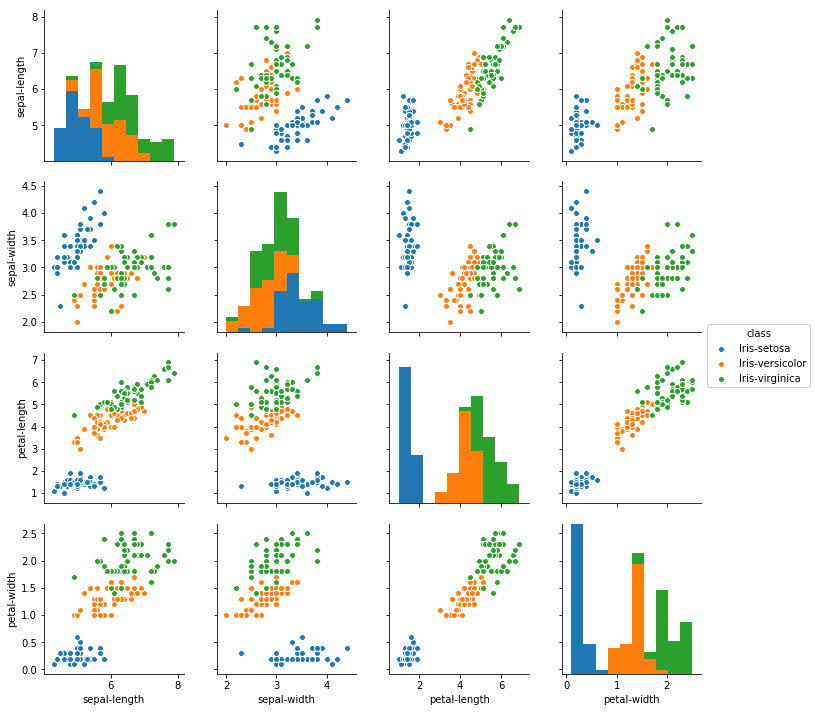

In [6]:
# Remove the NA values if any to enable the seaborn plot
sb.pairplot(iris_data.dropna(), hue='class');

### Observations from the scatter plot dataset

#### Petal length and Petal width are strong correlation for all the classes
#### Sepal width and Petal length looks correlated except for Iris-setosa
#### Sepal width and Petal width looks correlated except for Iris-setosa

### Add Box-Whisker plots to examine the outliers and percentile values

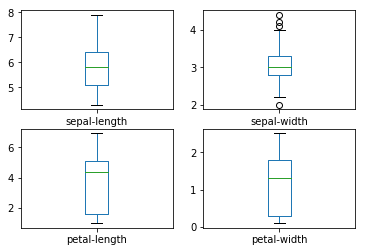

In [7]:
iris_data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

#### Sepal Width has few outliers

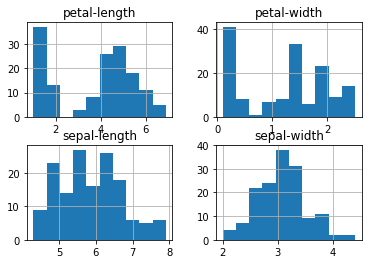

In [8]:
### Display Histograms for the features
iris_data.hist()
plt.show()

#### Plot the Violin plots which give more insight into the distribution of the feature dimensions for each class type (different Iris types)

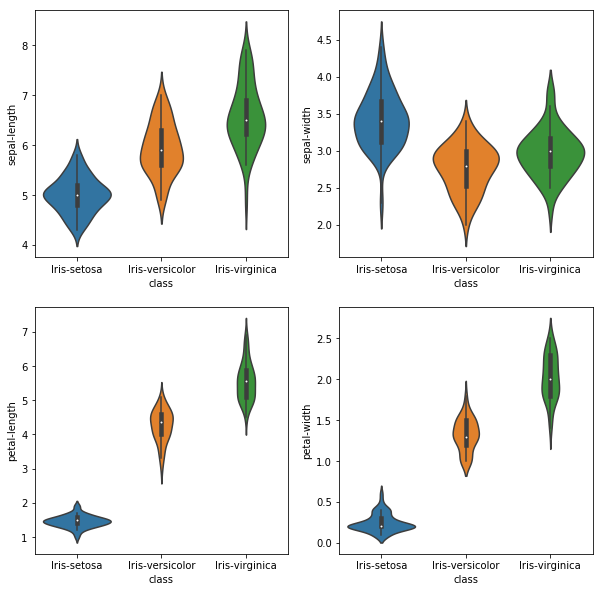

In [9]:
# Defining the figure(canvas) for plotting the needed graphs/plots
plt.figure(figsize = (10, 10))

for column_index, column in enumerate(iris_data.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x = 'class', y = column, data = iris_data)

### Split the data into train-test data required to build a ML model

#### The test data will be exclusively used for testing the trained model to verify if the trained model is a correct fit

In [10]:
# Import 
from sklearn.model_selection import train_test_split

# Extract all the data 
all_inputs = iris_data[['sepal-length', 'sepal-width',
                             'petal-length', 'petal-width']].values

# Extract all the classes
all_classes = iris_data['class'].values

(training_inputs, testing_inputs, training_classes, testing_classes) = train_test_split(all_inputs, all_classes, test_size = 0.25, random_state = 1)

#### Create multiple ML model python class instances which can be applied on the test data

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

ML_models = []
ML_models.append(('LR', LogisticRegression()))
ML_models.append(('LDA', LinearDiscriminantAnalysis()))
ML_models.append(('KNN', KNeighborsClassifier()))
ML_models.append(('DTC', DecisionTreeClassifier()))
ML_models.append(('RFC', RandomForestClassifier()))
ML_models.append(('NB', GaussianNB()))
ML_models.append(('SVM', SVC()))

#### Perform Cross-validation to find the model accuracies

In [12]:
from sklearn import model_selection
seed = 7
scoring = 'accuracy'

results = []
names = []

#evaluate each model in turn
for name, model in ML_models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, training_inputs, training_classes, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.928788 (0.078963)
LDA: 0.972727 (0.041660)
KNN: 0.937121 (0.041224)
DTC: 0.937121 (0.081597)
RFC: 0.937121 (0.057899)
NB: 0.946212 (0.043972)
SVM: 0.981818 (0.036364)


#### Perform DecisionTree Classifier Prediction

In [13]:
# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

#Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

#Validate the classifier on the Test set
decision_tree_classifier.score(testing_inputs, testing_classes)

0.9736842105263158

#### Display the Decision Tree created for this calculation

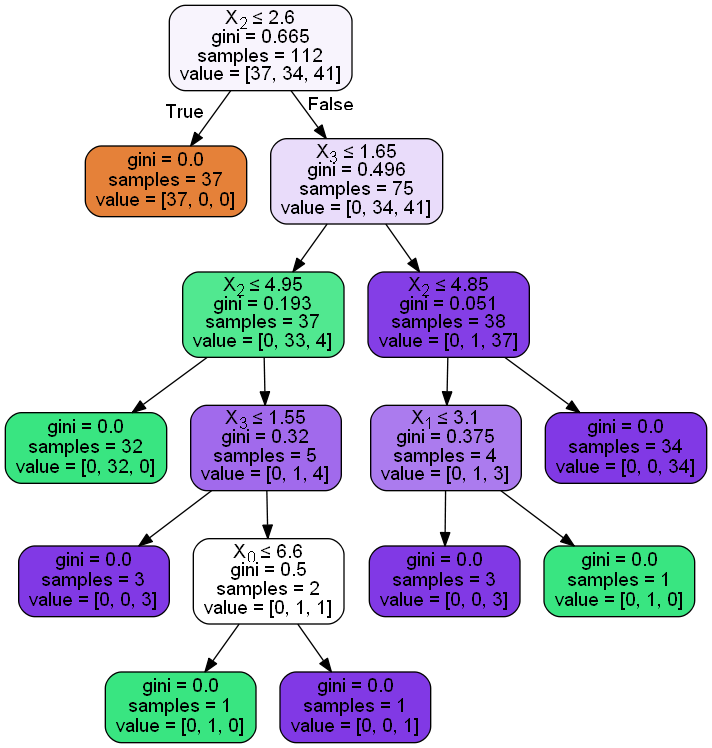

In [14]:
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

labels = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']

classes = list(iris_data['class'].unique())

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(decision_tree_classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


### The models accuracy is high, hence it seem to be a overfit, may not work as expected on a new data set.

#### Depending on how the training and testing data was sampled, the model accuracy may change, let us change the model sampling
#### and try to see how the accuracy varies

### Apply this methodology to all the Classifiers

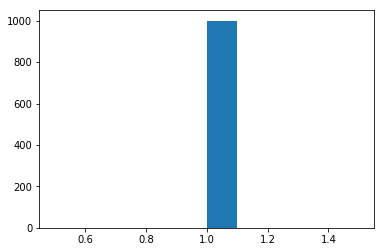

In [15]:
# Variable to capture the accuracy of all the random samples
model_accuracies = []

for var in range(1000):
    (training_inputs, 
     testing_inputs, 
     training_classes, 
     testing_classes) = train_test_split(all_inputs, all_classes, test_size = 0.25)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(testing_inputs, testing_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies);

#### The model has learnt to classify so well with this training and test data that it may fail when it is used against some new data. So this may not be a right model for the solution. 

### This is called Over-Fitting.

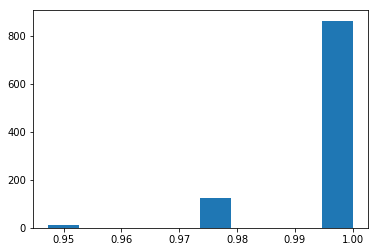

In [16]:
# Use Random Forest classification method.
model_accuracies = []

for var in range(1000):
    (training_inputs, 
     testing_inputs, 
     training_classes, 
     testing_classes) = train_test_split(all_inputs, all_classes, test_size = 0.25)
    
    random_forest_classifier = RandomForestClassifier()
    random_forest_classifier.fit(testing_inputs, testing_classes)
    classifier_accuracy = random_forest_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies);

#### This does not improve the model over-fitting by much. So we should be trying other models.

Use SVM method
---

0.9723157894736895

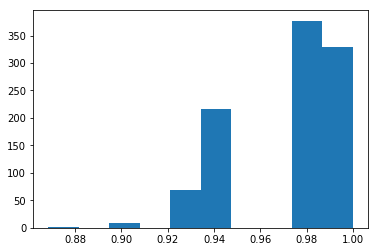

In [24]:
model_accuracies = []

for var in range(1000):
    (training_inputs, 
     testing_inputs, 
     training_classes, 
     testing_classes) = train_test_split(all_inputs, all_classes, test_size = 0.25)
    
    svm_classifier = SVC()
    svm_classifier.fit(testing_inputs, testing_classes)
    classifier_accuracy = svm_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies);

sum(model_accuracies)/len(model_accuracies)

<div class="alert alert-block alert-success">
<b>SVM Method:</b> the fit is better than the DecisionTree Classifier.
</div>

**Let us try the RandomForestClassifier to see if it produces a better model which is flexible**

0.9472894736842173

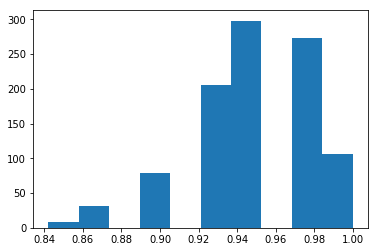

In [25]:
model_accuracies = []

for var in range(1000):
    (training_inputs, 
    testing_inputs,
    training_classes,
    testing_classes) = train_test_split(all_inputs, all_classes, test_size=0.25)
    
    random_forest_classifier = RandomForestClassifier()
    random_forest_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = random_forest_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)

plt.hist(model_accuracies);

sum(model_accuracies)/len(model_accuracies)

<div class="alert alert-block alert-success">
<b>Random Forest Classifier:</b> The accuracy of the model is better the previous models
</div>

<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
Adjust the Hyper-parameters of the Random Forest Classifier model to see if the accuracy improves.
</div>

In [95]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 100],
                 'criterion': ['gini', 'entropy'],
                 'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier, 
                          param_grid = parameter_grid,
                          cv = cross_validation)

grid_search.fit(all_inputs, all_classes)
print("Best score: {}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.9724137931034482
Best parameters: {'criterion': 'gini', 'max_features': 3, 'n_estimators': 10}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

<div class="alert alert-block alert-success">
<b>Random Forest Classifier:</b> Accuracy of Random Forest Classifier and Decision Tree Classifier seem to be close to each other, any of the classifier models can be used to predict the class (flower variant) among the IRIS dataset.
</div>

### Try XGBoost Model - If this is any better than the previous models.

In [26]:
import xgboost as xgb

In [27]:
X = iris_data[labels]
y = iris_data['class']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create an XGB classifier and instance of the same
from sklearn import svm
from xgboost import XGBClassifier
clf = XGBClassifier()
clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [30]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [31]:
y_pred = clf.predict(X_test)

C:\Users\gvran\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [32]:
#classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

1.0


### It is a perfect model which is well tuned to its train and test data. Not sure how it would perform with the real-time data.